In [1]:
from trainer import *

with open('configs/mac_test.yaml') as file:
    config = yaml.full_load(file)
 
trainer = Trainer(config)

Saving checkpoint..
Initializing samples..


/Users/lakshjaisinghani/miniforge3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
dataset = trainer.dataset
sample = dataset.__getitem__(100)

In [3]:
poses =  sample['oxts']
poses = [pose.unsqueeze(0) for pose in poses]
poses

[tensor([[ 0.0471,  0.0086, -0.2656, -1.1819,  0.3272, -0.0218]],
        dtype=torch.float64),
 tensor([[ 0.0421,  0.0098, -0.2648,  1.0646, -0.2914,  0.0150]],
        dtype=torch.float64)]

In [4]:
list(sample)

['tgt', 'ref_imgs', 'intrinsics', 'oxts', 'groundtruth']

# Understanding the Inverse Warp

In [5]:
from copy import deepcopy
from utils.transforms import UnNormalize

unnormalize = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

target   = deepcopy(unnormalize(sample['tgt']))
ref_imgs = [deepcopy(unnormalize(ref)) for ref in sample['ref_imgs']]
depth    = deepcopy(sample['groundtruth'])
intrinsics = deepcopy(sample['intrinsics'])

In [6]:
img_plot  = np.transpose(target.squeeze().cpu().detach().numpy(), (1, 2, 0))
refs_plot = [np.transpose(img.squeeze().cpu().detach().numpy(), (1, 2, 0)) for img in ref_imgs]

Text(0.5, 1.0, 'gt')

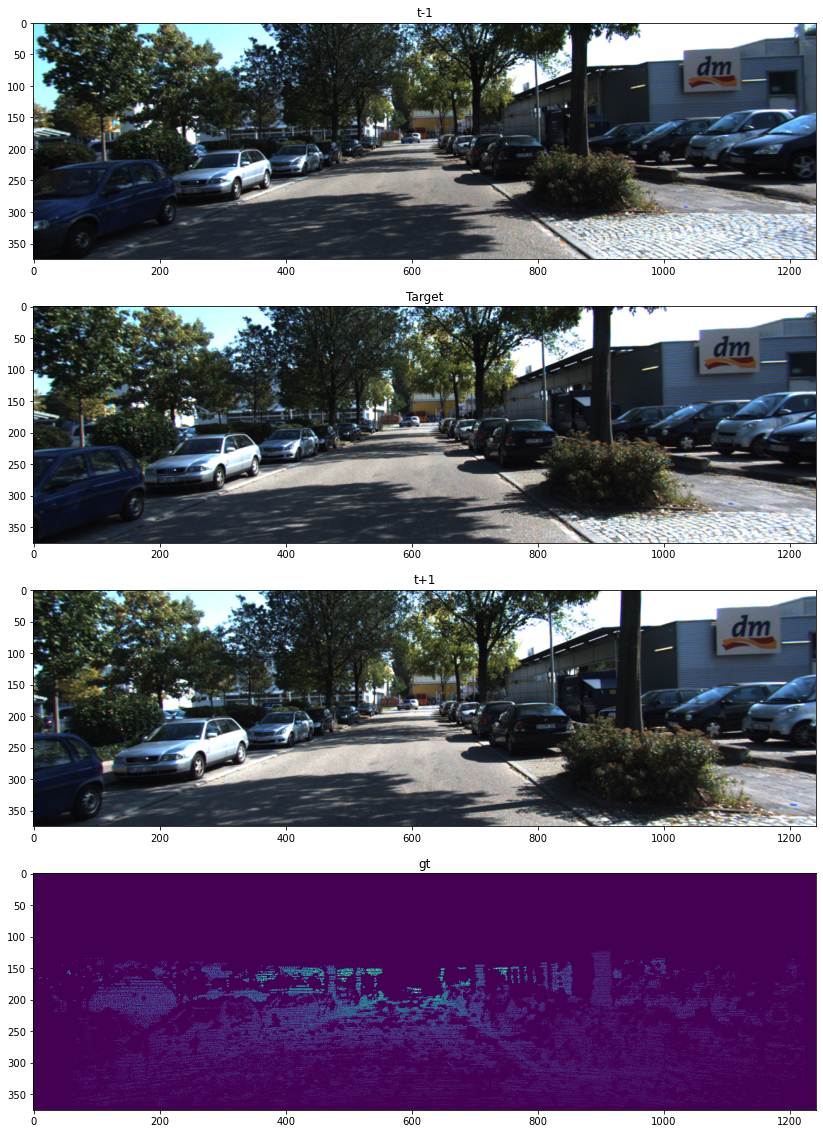

In [7]:
fig, axs = plt.subplots(4, figsize=(20, 20))
axs[0].imshow(refs_plot[0])
axs[0].set_title('t-1')
axs[1].imshow(img_plot)
axs[1].set_title('Target')
axs[2].imshow(refs_plot[1])
axs[2].set_title('t+1')
axs[3].imshow(depth)
axs[3].set_title('gt')

In [8]:
from geometry.pose_geometry import inverse_warp, disp_to_depth

In [9]:
poses[0]

tensor([[ 0.0471,  0.0086, -0.2656, -1.1819,  0.3272, -0.0218]],
       dtype=torch.float64)

In [10]:
projected_imgs = [inverse_warp(ref_img.unsqueeze(0), depth.unsqueeze(0), pose, intrinsics, warp_test=True) for ref_img, pose in zip(ref_imgs, poses)]

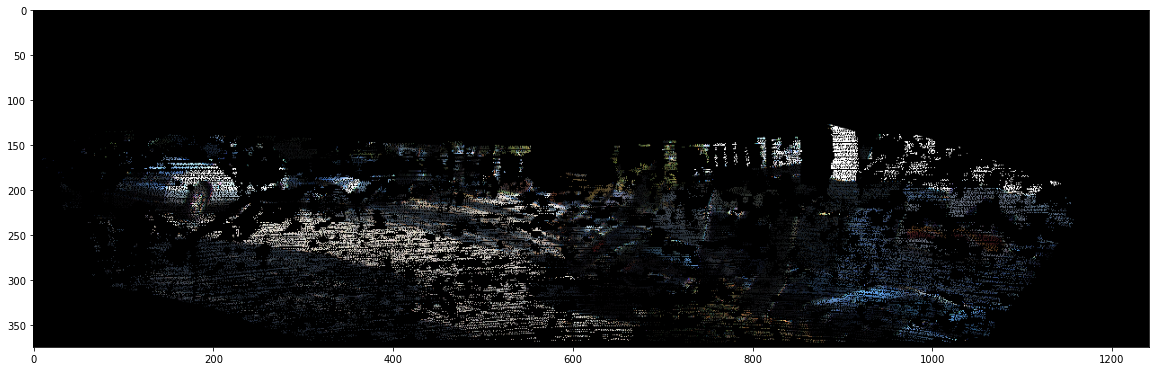

In [11]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(np.transpose(np.array(projected_imgs[1][0]), (1, 2, 0)))

## Pose plot